# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

### Problem Cube Initialization

In [4]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

In [5]:
# cube.plot_cube()

In [6]:
# cube.plot_per_level()

In [7]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 1743638.0


## Local Seach Implementation

### Steepest Ascent Hill-Climbing

### Simulated Annealing

In [8]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 1278394.0


In [13]:
SA = Simulated(cube=cube,tmax=10000,step_max=10000,cooling_schedule="linear")

Initial Energy: 4126848.0

best_energy = 4126848.0

current_energy = 4126848.0

de = 3036.0

best_energy = 4126848.0

current_energy = 4129884.0

de = 1014.0

best_energy = 4126848.0

current_energy = 4130898.0

de = 15356.0

best_energy = 4126848.0

current_energy = 4130898.0

de = 14750.0

best_energy = 4126848.0

current_energy = 4130898.0

de = 8810.0

best_energy = 4126848.0

current_energy = 4130898.0

de = 6309.0

best_energy = 4126848.0

current_energy = 4137207.0

de = 0.0

best_energy = 4126848.0

current_energy = 4137207.0

de = 9894.0

best_energy = 4126848.0

current_energy = 4147101.0

e_n = 4117827.0

de = -29274.0

best_energy = 4117827.0

current_energy = 4117827.0

de = 504.0

best_energy = 4117827.0

current_energy = 4118331.0

e_n = 4104291.0

de = -14040.0

best_energy = 4104291.0

current_energy = 4104291.0

e_n = 4093071.0

de = -11220.0

best_energy = 4093071.0

current_energy = 4093071.0

e_n = 4092259.0

de = -812.0

best_energy = 4092259.0

current_energy = 4

In [10]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: quadratic multiplicative
  initial temp: 10000
    final temp: 0.000101
     max steps: 10000
    final step: 10001

  final energy: 1718786.000000

+-------------------------- END ---------------------------+


In [11]:
print(f"differences from ideal: {SA.best_energy - goal_cube.objective_function()}")

differences from ideal: 440392.0


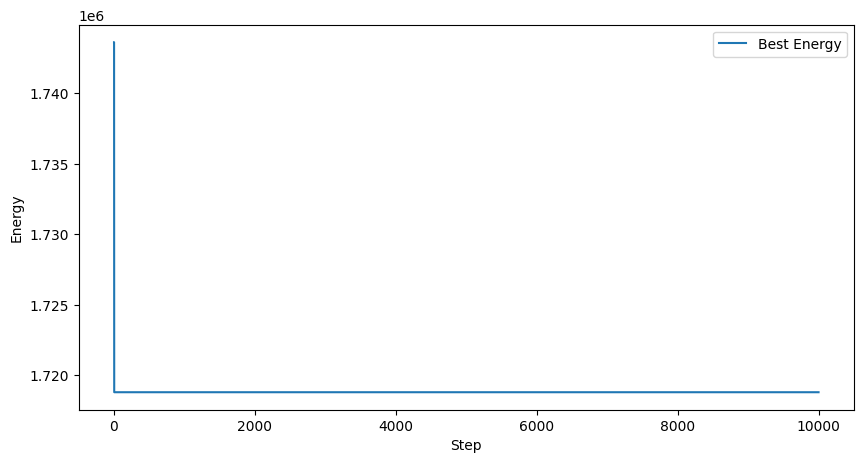

In [12]:
SA.hist_plot()

### Genetic Algorithm
